In [1]:
# Loading data
# data from kaggle: https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dO = pd.read_csv('/Users/anand/Documents/Datasets/digit-recognizer/train.csv')
dO.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Saving the label into a variable l
l = dO['label']

In [3]:
# Drop the label feature and store the pixel data in d
d = dO.drop('label', axis=1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


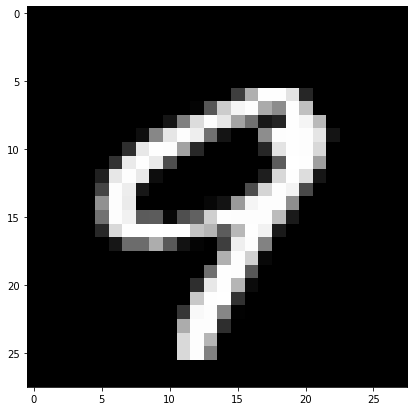

In [5]:
# Display or plot a number
plt.figure(figsize=(7,7))
idx = 100

# grid_data = d.iloc[idx].as_matrix().reshape(28,28) # reshape from 1D to 2D
grid_data = d.iloc[idx].values.reshape(28,28) # reshape from 1D to 2D
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

# Exercise: Perform the same analysis on all of the 42K data-points


In [6]:
labels = l.copy()
data = d.copy()

In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

# Find the co-variance matrix which is 1/n * A^T * A
sample_data = standardized_data

(42000, 784)


In [11]:

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

covar_matrix.shape

(784, 784)

In [12]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2Dim Space
from scipy.linalg import eigh 

values, vectors = eigh(covar_matrix, eigvals=(782,783)) # eigen values are in ascending order, taking the top 2

vectors.shape

/var/folders/p_/fs2tb7r13c534frxmkk64z4w0000gn/T/ipykernel_2469/370669600.py:5: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix, eigvals=(782,783)) # eigen values are in ascending order, taking the top 2


(784, 2)

In [13]:
vectors = vectors.T

In [14]:
vectors.shape

(2, 784)

In [15]:
# Projecting the original data sample on the plane

import matplotlib.pyplot as plt 
new_coordinates = np.matmul(vectors, sample_data.T)

print(vectors.shape, sample_data.shape, new_coordinates.shape)

(2, 784) (42000, 784) (2, 42000)


In [16]:

# appending label to the 2nd projected data

new_coordinates = np.vstack((new_coordinates,labels)).T 

# creating a new data frame for ploting the labeled points

dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_pricipal','label'))

dataframe.head()

,1st_principal,2nd_pricipal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


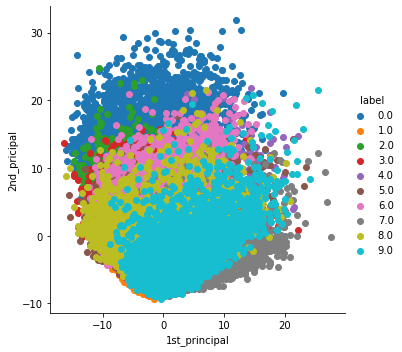

In [17]:
sns.FacetGrid(dataframe, hue='label',height=5, aspect=1).map(plt.scatter, '1st_principal','2nd_pricipal').add_legend()
plt.show()